### Tommaso Armadillo matr. 885460

# <span style="color:red"> Numerical Exercise 7</span>

## <span style="color:blue"> Exercise 7.1</span>
#### Scope
The scope of the exercise was to use the Monte Carlo NVT code to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$, $\delta=0.1$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$, $\delta=0.2$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$, $\delta=6.0$ (cut-off radius: $r_c = 5.0$)

#### Instruction to compile
Code is in the folder <font face = "Courier"> Esercizio7.1 </font>. It can be compiled using <font face = "Courier"> `$make` </font> and executed with <font face = "Courier"> `$./Monte_Carlo_NVT.exe` </font>. 
In the file <font face = "Courier"> 'input.dat' </font> you can set the temperature, the number of particle, the densiti, the cut-off radius, delta, the number of blocks and the total number of steps of the simulation.
The code produces four files as output, mean as a function of blocks and instantaneous value for potential energy and pression of the system.

#### Istaneous value
After equilibrating the system we let the simulation run for $M=10^5$ steps, recording istantaneous values for potential energy and pression. Below I plotted results for liquid.

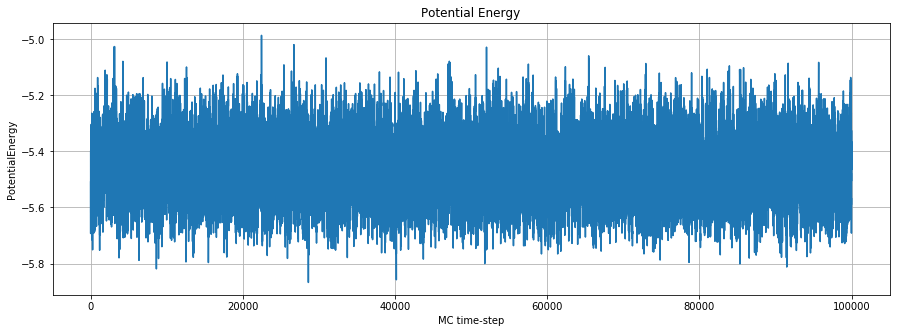

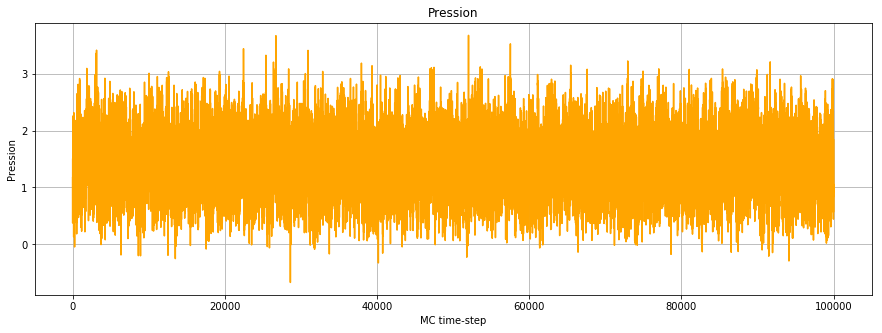

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]

En = np.loadtxt("Esercizio7.1/liquid/Potentialenergy.dat", usecols=(0), unpack='true')
Pr = np.loadtxt("Esercizio7.1/liquid/Pression.dat", usecols=(0), unpack='true')
plt.plot(En)
plt.xlabel('MC time-step')
plt.ylabel('PotentialEnergy')
plt.grid(True)
plt.title("Potential Energy")
plt.show()

plt.plot(Pr, color='orange')
plt.xlabel('MC time-step')
plt.ylabel('Pression')
plt.grid(True)
plt.title("Pression")
plt.show()

For both potential energy and pression the istantaneous value oscillate around it's mean value.

#### Autocorrelation function
Now we want to draw the autocorrelation function. It is defined:

$$
\chi(t) = \frac{\langle m(t')m(t+t')\rangle_{t'} -\langle m \rangle^2}{\sigma_m^2}
$$

So first we have to calculate mean value and variance for Energy and pression.

In [7]:
#AUTOCORRELATION FUNCTION

#Calculating it for time from 0 to 5000
energy_mean = 0
energy_square = 0
pression_mean = 0
pression_square = 0
for i in range (0,100000):
    energy_mean += En[i]
    energy_square += En[i]**2
    pression_mean += Pr[i]
    pression_square += Pr[i]**2
    
energy_mean /= 100000
pression_mean /= 100000

energy_square /= 100000
pression_square /= 100000

energy_variance = energy_square - energy_mean**2
pression_variance = pression_square - pression_mean**2

print("Energy:")
print("Mean value : " + str(energy_mean))
print("Variance   : " + str(energy_variance) + "\n")
print("Pression:")
print("Mean value : " + str(pression_mean))
print("Variance   : " + str(pression_variance))

Energy:
Mean value : -5.4658188240000385
Variance   : 0.009737941194124744

Pression:
Mean value : 1.3920887634111248
Variance   : 0.22013797627239828


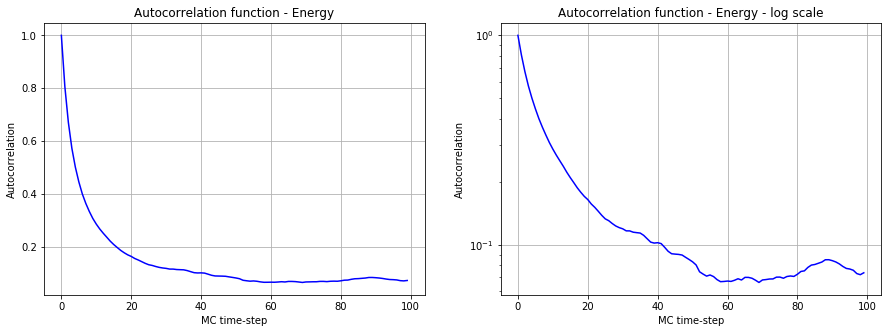

In [8]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 5]


AC_energy = []
for i in range(0,100):
    mean_tmp = 0.
    count = 0
    for j in range (0,100000-i):
        mean_tmp += En[j] * En[i+j]
        count+=1
    mean_tmp /= count
    AC_energy.append( (mean_tmp - energy_mean**2) / energy_variance )
        
ax[0].plot(AC_energy, color='blue')
ax[0].set_xlabel('MC time-step')
ax[0].set_ylabel('Autocorrelation')
ax[0].grid(True)
ax[0].set_title("Autocorrelation function - Energy")

ax[1].plot(AC_energy, color='blue')
ax[1].set_xlabel('MC time-step')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_yscale('log')
ax[1].grid(True)
ax[1].set_title("Autocorrelation function - Energy - log scale")
plt.show()       

The autocorrelation function is expected to decay exponentially, so we try to fit with a function:

$$
\chi(t) = e^{-\frac{t}{t_c}}
$$

where $t_c$ is the correlation time which is the typical time-scale on which the autocorrelation drops off. After a time of $2t_c$ instant values get scorrelated.

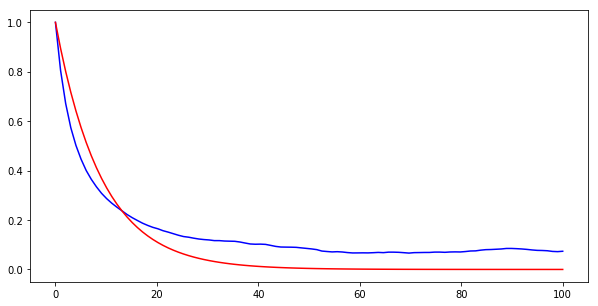

Best fit is f(t) = exp(-t/ 9.108756351299121  )


In [10]:
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [10, 5]

x=np.linspace(0, 100, 100)

#try to fit f(N)= EXP(-x/a)
def f (x, a):
    return np.exp(-x/a) 

popt, pcov = curve_fit(f, x, AC_energy)
plt.plot(x, AC_energy, color='blue')
x = np.asarray(x)
plt.plot(x, f(x, *popt), 'r')
plt.show()
print('Best fit is f(t) = exp(-t/', popt[0], ' )' )

In red we plotted the best fit for the autocorrelation function. So $t_c\sim 9$

We can do the same thingh for pression:

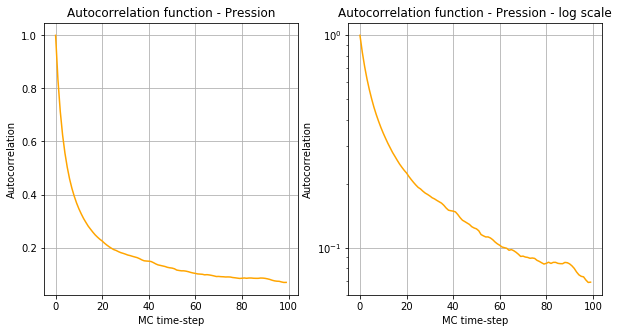

In [11]:
fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [15, 5]

AC_pression = []

for i in range(0,100):
    mean_tmp = 0.
    count = 0
    for j in range (0,100000-i):
        mean_tmp += Pr[j] * Pr[i+j]
        count+=1
    mean_tmp /= count
    AC_pression.append( (mean_tmp - pression_mean**2) / pression_variance )
        
ax[0].plot(AC_pression, color='orange')
ax[0].set_xlabel('MC time-step')
ax[0].set_ylabel('Autocorrelation')
ax[0].grid(True)
ax[0].set_title("Autocorrelation function - Pression")

ax[1].plot(AC_pression, color='orange')
ax[1].set_xlabel('MC time-step')
ax[1].set_ylabel('Autocorrelation')
ax[1].set_yscale('log')
ax[1].grid(True)
ax[1].set_title("Autocorrelation function - Pression - log scale")
plt.show()       

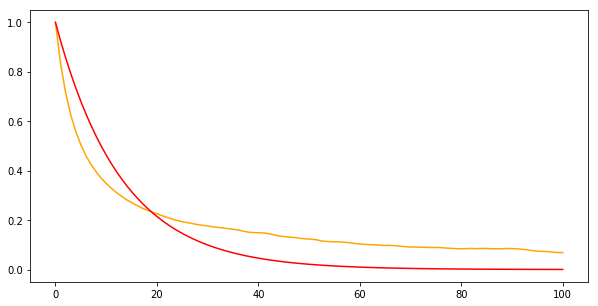

Best fit is f(t) = exp(-t/ 13.002357686608862  )


In [12]:
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [10, 5]

x=np.linspace(0,100,100)
#try to fit f(N)= EXP(-x/a)
def f (x, a):
    return np.exp(-x/a) 

popt, pcov = curve_fit(f, x, AC_pression)
plt.plot(x, AC_pression, color='orange')
x = np.asarray(x)
plt.plot(x , f(x, popt[0]), 'r')
plt.show()
print('Best fit is f(t) = exp(-t/', popt[0], ' )' )

In this case the correlation time is $t_c\sim13$

We can do the same calculations for the solid and gas phase. We obtain:
###### Solid
Autocorrelation time for Potential Energy: 10

Autocorrelation time for Pression:         10

###### Liquid
Autocorrelation time for Potential Energy: 9

Autocorrelation time for Pression:         13

###### Gas
Autocorrelation time for Potential Energy: 2

Autocorrelation time for Pression:         1

#### Size of blocks
We can use this data in order to study how the statistical uncertainties of the expectation value of $U/N$ and $P$ depends on the size of blocks, in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. To do so we wrote a python script which divide the instantaneous value in $N$ blocks of dimension $L$ and computes the statistical uncertainties of the expectation value. It repeates this calculation for $L$ from $10$ to $5\times10^3$ in step of $10$. These are the results

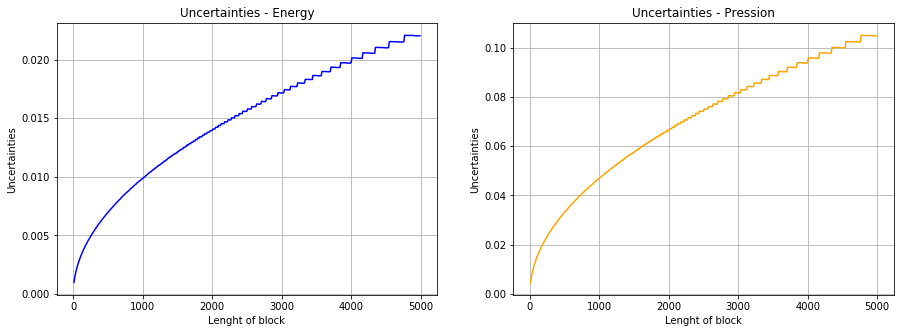

In [15]:
L_min = 10
L_max = 5000
L_step = 10
n_step = int((L_max-L_min)/L_step)
x_error = np.zeros(n_step)
y_error_en = np.zeros(n_step)
y_error_pr = np.zeros(n_step)

#cycle for different values of L
for index in range (n_step):
    L = L_min + index*L_step
    n_block = int(100000/L)
    en_mean_L    = 0.
    en_mean_sq_L = 0.
    pr_mean_L    = 0.
    pr_mean_sq_L = 0.
    
    #cycle for blocks
    for i in range (int(n_block)):
        en_mean_bl    = 0.
        en_mean_sq_bl = 0.
        pr_mean_bl    = 0.
        pr_mean_sq_bl = 0.
        count = 0
        #cycle for values inside block
        for j in range (L):
            count += 1
            en_mean_bl    += En[i*L+j]
            en_mean_sq_bl += En[i*L+j]**2
            pr_mean_bl    += Pr[i*L+j]
            pr_mean_sq_bl += Pr[i*L+j]**2

        en_mean_bl    /= count
        en_mean_sq_bl /= count
        
        pr_mean_bl    /= count
        pr_mean_sq_bl /= count


        en_mean_L += en_mean_bl
        en_mean_sq_L += en_mean_sq_bl
        pr_mean_L += pr_mean_bl
        pr_mean_sq_L += pr_mean_sq_bl

    en_mean_L /= n_block
    en_mean_sq_L /= n_block
    
    pr_mean_L /= n_block
    pr_mean_sq_L /= n_block

    x_error[index] = L
    y_error_en[index] = np.sqrt( (en_mean_sq_L - en_mean_L**2)/n_block )
    y_error_pr[index] = np.sqrt( (pr_mean_sq_L - pr_mean_L**2)/n_block )

fig, ax = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [20, 5]

ax[0].plot(x_error, y_error_en, color='blue')
ax[0].set_xlabel('Lenght of block')
ax[0].set_ylabel('Uncertainties')
ax[0].grid(True)
ax[0].set_title("Uncertainties - Energy")

ax[1].plot(x_error, y_error_pr, color='orange')
ax[1].set_xlabel('Lenght of block')
ax[1].set_ylabel('Uncertainties')
ax[1].grid(True)
ax[1].set_title("Uncertainties - Pression")
plt.show()

Where for each value of L we computed the uncertainties as

$$
\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N En^2_i - \left( \frac{1}{N} \sum_{i=1}^N En_i \right)^2 \right]} 
$$
where $N$ is the number of blocks. We see the uncertainties grows with the leght of blocks. This is because if the lenght of a single block grows up, and the totale number of MC-steps stay the same ($10^5$) the number of blocks has to decrease and so the error encrease.

To have a small error the leght of blocks has to be as small as possible, so the number of blocks is bigger, but not smaller than $2-3 \times t_c$ otherwise we cannot use the CLT and calculate the the uncertainties as shown above. 

In our case we can choose L in the following way

##### solid $\to$ 30
##### liquid $\to$ 40
##### gas $\to$ 10

In the gas phase, positions get scorrelated in only 5 moves because the $\delta$ parametres of Metropolis algorithm is $6.0$, while the edge of the simulation box is $\sim12$ when the algorithm make a move every particle can end in every positions of the box and the position is independent from the previous one.

#### Exercise 7.3
We have to implement the calculation for $g(r)$ which is the distribution of the distance between two particles. The results are plotted below:

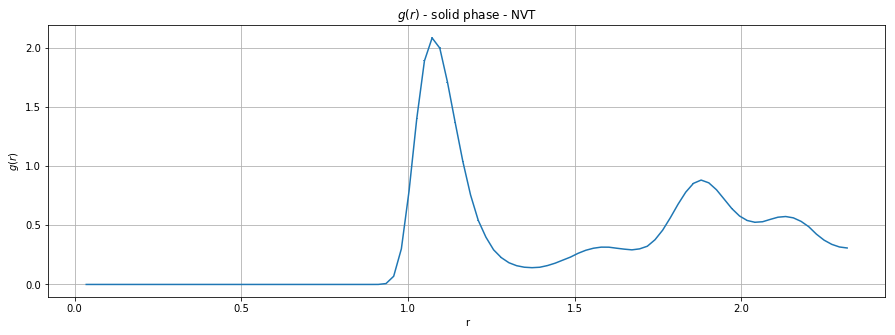

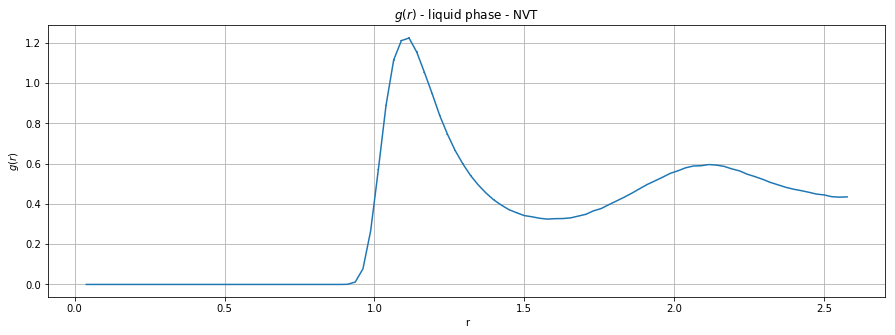

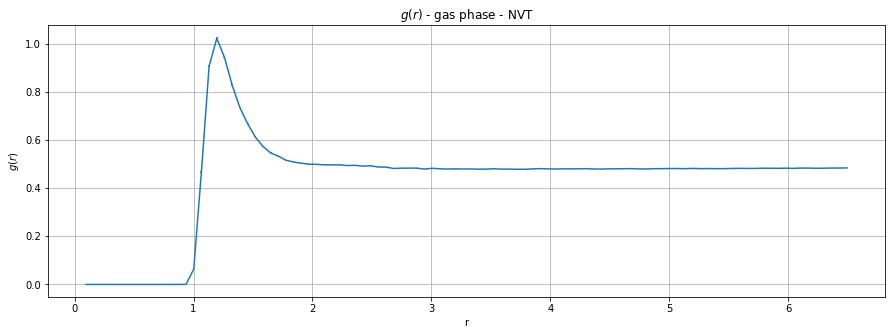

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]

r_solid, gofr_solid, err_g_solid = np.loadtxt("Esercizio7.1/solid/output.gave.0", usecols=(0,1,2), unpack='true')
r_liquid, gofr_liquid, err_g_liquid = np.loadtxt("Esercizio7.1/liquid/output.gave.0", usecols=(0,1,2), unpack='true')
r_gas, gofr_gas, err_g_gas = np.loadtxt("Esercizio7.1/gas/output.gave.0", usecols=(0,1,2), unpack='true')

plt.errorbar(r_solid, gofr_solid, err_g_solid)
plt.xlabel('r')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title("$g(r)$ - solid phase - NVT")
plt.show()

plt.errorbar(r_liquid, gofr_liquid, err_g_liquid)
plt.xlabel('r')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title("$g(r)$ - liquid phase - NVT")
plt.show()

plt.errorbar(r_gas, gofr_gas, err_g_gas)
plt.xlabel('r')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title("$g(r)$ - gas phase - NVT")
plt.show()

#### Exercise 7.3
We have to upgrade the code of the 4-th numerical exercise, Molecoular dynamics, with the calculation of $g(r)$:

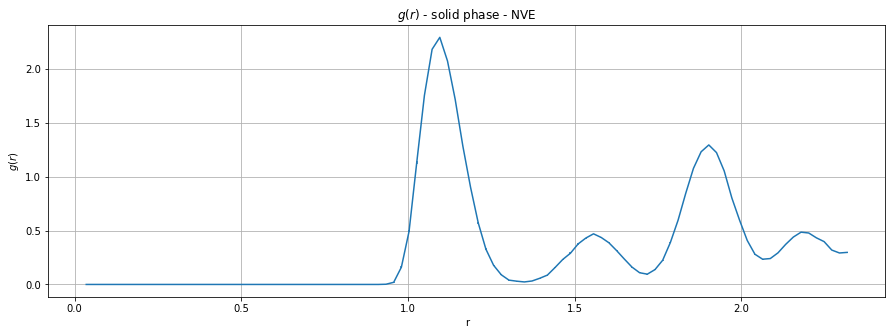

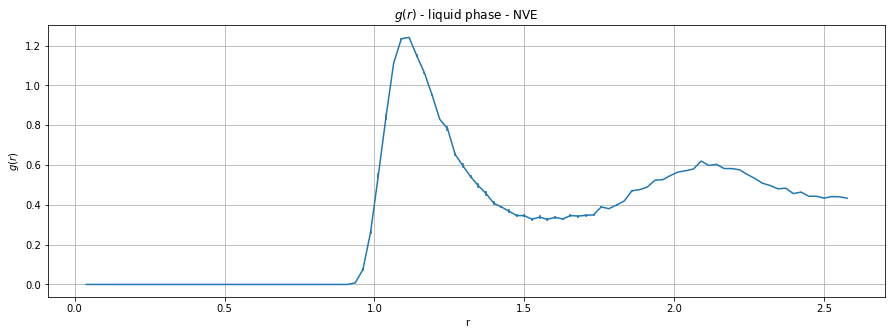

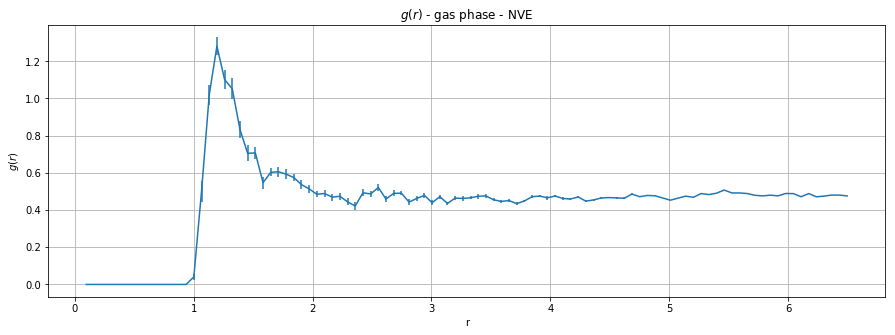

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 5]

r_solid, gofr_solid, err_g_solid = np.loadtxt("../Esercizio_4/Esercizio4.1/results_solid/output.gave.0", usecols=(0,1,2), unpack='true')
r_liquid, gofr_liquid, err_g_liquid = np.loadtxt("../Esercizio_4/Esercizio4.1/results_liquid/output.gave.0", usecols=(0,1,2), unpack='true')
r_gas, gofr_gas, err_g_gas = np.loadtxt("../Esercizio_4/Esercizio4.1/results_gas/output.gave.0", usecols=(0,1,2), unpack='true')

plt.errorbar(r_solid, gofr_solid, err_g_solid)
plt.xlabel('r')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title("$g(r)$ - solid phase - NVE")
plt.show()

plt.errorbar(r_liquid, gofr_liquid, err_g_liquid)
plt.xlabel('r')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title("$g(r)$ - liquid phase - NVE")
plt.show()

plt.errorbar(r_gas, gofr_gas, err_g_gas)
plt.xlabel('r')
plt.ylabel('$g(r)$')
plt.grid(True)
plt.title("$g(r)$ - gas phase - NVE")
plt.show()

Results are almost identical to the ones we obtained with the NVT code.

### Exercise 7.4
Now we have to run the simulation for equilibrated box of particles of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and compare results with the ones we obtained during numerical exercise 4 (Molecoular Dynamics with Verlet algorithm).

#### Solid

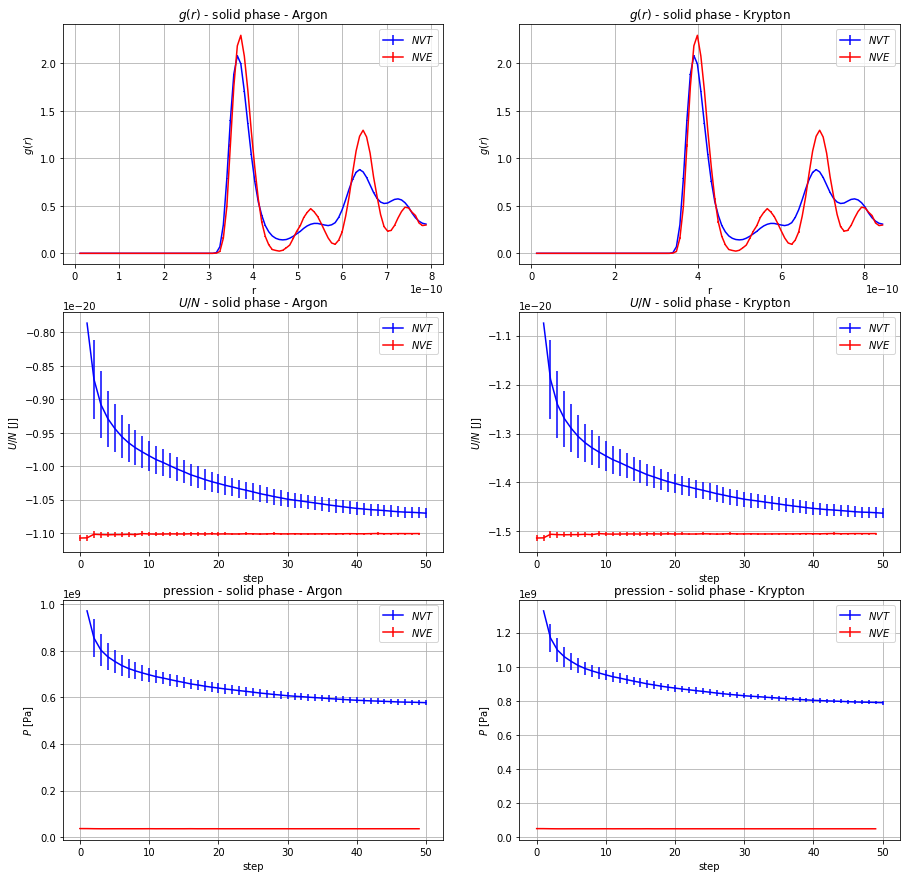

In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(3,2)

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
eps_kb_kr = 164.0
sigma_kr = 0.364E-9
eps_kr = eps_kb_kr * kb

r_solid_NVT, gofr_solid_NVT, err_g_solid_NVT = np.loadtxt("Esercizio7.1/solid/output.gave.0", usecols=(0,1,2), unpack='true')
r_solid_NVE, gofr_solid_NVE, err_g_solid_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_solid/output.gave.0", usecols=(0,1,2), unpack='true')

step_solid_NVT, en_solid_NVT, err_en_solid_NVT = np.loadtxt("Esercizio7.1/solid/output.epot.0", usecols=(0,2,3), unpack='true')
step_solid_NVE, en_solid_NVE, err_en_solid_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_solid/output_epot_ave.dat", usecols=(0,1,2), unpack='true')

step2_solid_NVT, pr_solid_NVT, err_pr_solid_NVT = np.loadtxt("Esercizio7.1/solid/output.pres.0", usecols=(0,2,3), unpack='true')
step2_solid_NVE, pr_solid_NVE, err_pr_solid_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_solid/output_press_ave.dat", usecols=(0,1,2), unpack='true')

ax[0][0].errorbar(r_solid_NVT*sigma_arg, gofr_solid_NVT, err_g_solid_NVT, color='blue')
ax[0][0].errorbar(r_solid_NVE*sigma_arg, gofr_solid_NVE, err_g_solid_NVE, color='red')
ax[0][0].set_xlabel('r')
ax[0][0].set_ylabel('$g(r)$')
ax[0][0].grid(True)
ax[0][0].set_title("$g(r)$ - solid phase - Argon")
ax[0][0].legend( ['$NVT$', '$NVE$'])

ax[0][1].errorbar(r_solid_NVT*sigma_kr, gofr_solid_NVT, err_g_solid_NVT, color='blue')
ax[0][1].errorbar(r_solid_NVE*sigma_kr, gofr_solid_NVE, err_g_solid_NVE, color='red')
ax[0][1].set_xlabel('r')
ax[0][1].set_ylabel('$g(r)$')
ax[0][1].grid(True)
ax[0][1].set_title("$g(r)$ - solid phase - Krypton")
ax[0][1].legend( ['$NVT$', '$NVE$'])

ax[1][0].errorbar(step_solid_NVT, en_solid_NVT*eps_arg, yerr=err_en_solid_NVT*eps_arg, color='blue')
ax[1][0].errorbar(step_solid_NVE, en_solid_NVE*eps_arg, yerr=err_en_solid_NVE*eps_arg, color='red')
ax[1][0].set_xlabel('step')
ax[1][0].set_ylabel('$U/N$ [J]')
ax[1][0].grid(True)
ax[1][0].set_title("$U/N$ - solid phase - Argon")
ax[1][0].legend( ['$NVT$', '$NVE$'])

ax[1][1].errorbar(step_solid_NVT, en_solid_NVT*eps_kr, err_en_solid_NVT*eps_kr, color='blue')
ax[1][1].errorbar(step_solid_NVE, en_solid_NVE*eps_kr, err_en_solid_NVE*eps_kr, color='red')
ax[1][1].set_xlabel('step')
ax[1][1].set_ylabel('$U/N$ [J]')
ax[1][1].grid(True)
ax[1][1].set_title("$U/N$ - solid phase - Krypton")
ax[1][1].legend( ['$NVT$', '$NVE$'])

ax[2][0].errorbar(step2_solid_NVT, pr_solid_NVT*eps_arg/(sigma_arg**3), err_pr_solid_NVT*eps_arg/(sigma_arg**3), color='blue')
ax[2][0].errorbar(step2_solid_NVE, pr_solid_NVE*eps_arg/(sigma_arg**3), err_pr_solid_NVE*eps_arg/(sigma_arg**3), color='red')
ax[2][0].set_xlabel('step')
ax[2][0].set_ylabel('$P$ [Pa]')
ax[2][0].grid(True)
ax[2][0].set_title("pression - solid phase - Argon")
ax[2][0].legend( ['$NVT$', '$NVE$'])

ax[2][1].errorbar(step2_solid_NVT, pr_solid_NVT*eps_kr/(sigma_arg**3), err_pr_solid_NVT*eps_arg/(sigma_arg**3), color='blue')
ax[2][1].errorbar(step2_solid_NVE, pr_solid_NVE*eps_kr/(sigma_arg**3), err_pr_solid_NVE*eps_arg/(sigma_arg**3), color='red')
ax[2][1].set_xlabel('step')
ax[2][1].set_ylabel('$P$ [Pa]')
ax[2][1].grid(True)
ax[2][1].set_title("pression - solid phase - Krypton")
ax[2][1].legend( ['$NVT$', '$NVE$'])
plt.show()


#### Liquid

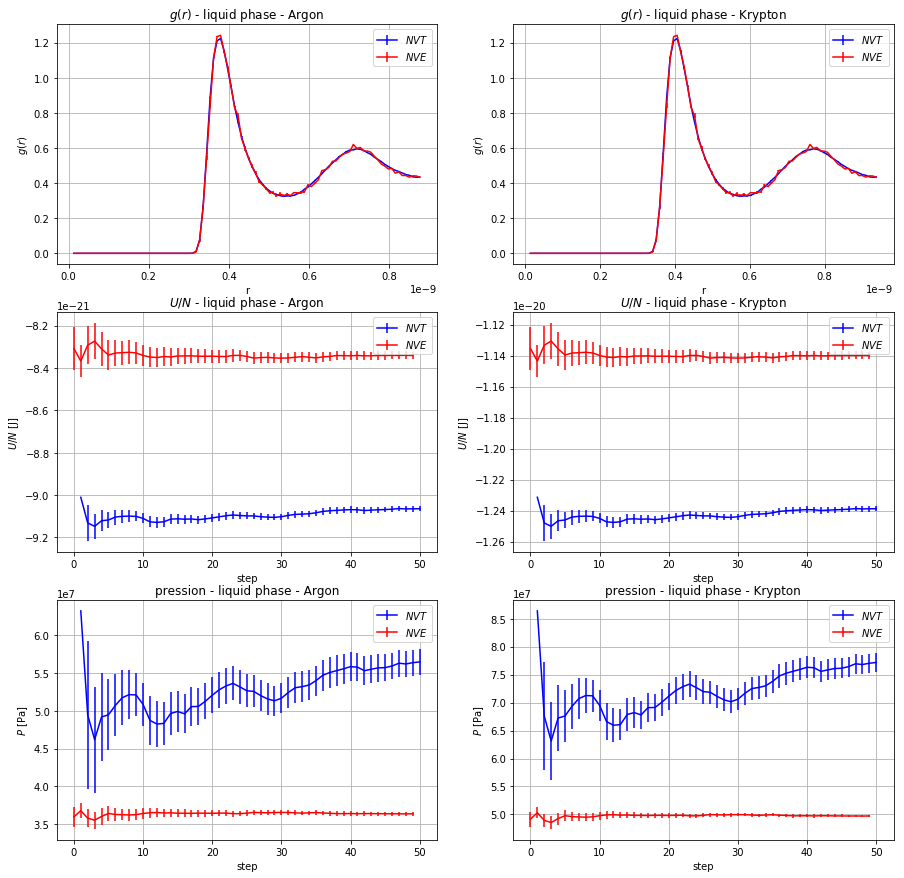

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(3,2)

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
eps_kb_kr = 164.0
sigma_kr = 0.364E-9
eps_kr = eps_kb_kr * kb

r_liquid_NVT, gofr_liquid_NVT, err_g_liquid_NVT = np.loadtxt("Esercizio7.1/liquid/output.gave.0", usecols=(0,1,2), unpack='true')
r_liquid_NVE, gofr_liquid_NVE, err_g_liquid_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_liquid/output.gave.0", usecols=(0,1,2), unpack='true')

step_liquid_NVT, en_liquid_NVT, err_en_liquid_NVT = np.loadtxt("Esercizio7.1/liquid/output.epot.0", usecols=(0,2,3), unpack='true')
step_liquid_NVE, en_liquid_NVE, err_en_liquid_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_liquid/output_epot_ave.dat", usecols=(0,1,2), unpack='true')

step2_liquid_NVT, pr_liquid_NVT, err_pr_liquid_NVT = np.loadtxt("Esercizio7.1/liquid/output.pres.0", usecols=(0,2,3), unpack='true')
step2_liquid_NVE, pr_liquid_NVE, err_pr_liquid_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_liquid/output_press_ave.dat", usecols=(0,1,2), unpack='true')

ax[0][0].errorbar(r_liquid_NVT*sigma_arg, gofr_liquid_NVT, err_g_liquid_NVT, color='blue')
ax[0][0].errorbar(r_liquid_NVE*sigma_arg, gofr_liquid_NVE, err_g_liquid_NVE, color='red')
ax[0][0].set_xlabel('r')
ax[0][0].set_ylabel('$g(r)$')
ax[0][0].grid(True)
ax[0][0].set_title("$g(r)$ - liquid phase - Argon")
ax[0][0].legend( ['$NVT$', '$NVE$'])

ax[0][1].errorbar(r_liquid_NVT*sigma_kr, gofr_liquid_NVT, err_g_liquid_NVT, color='blue')
ax[0][1].errorbar(r_liquid_NVE*sigma_kr, gofr_liquid_NVE, err_g_liquid_NVE, color='red')
ax[0][1].set_xlabel('r')
ax[0][1].set_ylabel('$g(r)$')
ax[0][1].grid(True)
ax[0][1].set_title("$g(r)$ - liquid phase - Krypton")
ax[0][1].legend( ['$NVT$', '$NVE$'])

ax[1][0].errorbar(step_liquid_NVT, en_liquid_NVT*eps_arg, yerr=err_en_liquid_NVT*eps_arg, color='blue')
ax[1][0].errorbar(step_liquid_NVE, en_liquid_NVE*eps_arg, yerr=err_en_liquid_NVE*eps_arg, color='red')
ax[1][0].set_xlabel('step')
ax[1][0].set_ylabel('$U/N$ [J]')
ax[1][0].grid(True)
ax[1][0].set_title("$U/N$ - liquid phase - Argon")
ax[1][0].legend( ['$NVT$', '$NVE$'])

ax[1][1].errorbar(step_liquid_NVT, en_liquid_NVT*eps_kr, err_en_liquid_NVT*eps_kr, color='blue')
ax[1][1].errorbar(step_liquid_NVE, en_liquid_NVE*eps_kr, err_en_liquid_NVE*eps_kr, color='red')
ax[1][1].set_xlabel('step')
ax[1][1].set_ylabel('$U/N$ [J]')
ax[1][1].grid(True)
ax[1][1].set_title("$U/N$ - liquid phase - Krypton")
ax[1][1].legend( ['$NVT$', '$NVE$'])

ax[2][0].errorbar(step2_liquid_NVT, pr_liquid_NVT*eps_arg/(sigma_arg**3), err_pr_liquid_NVT*eps_arg/(sigma_arg**3), color='blue')
ax[2][0].errorbar(step2_liquid_NVE, pr_liquid_NVE*eps_arg/(sigma_arg**3), err_pr_liquid_NVE*eps_arg/(sigma_arg**3), color='red')
ax[2][0].set_xlabel('step')
ax[2][0].set_ylabel('$P$ [Pa]')
ax[2][0].grid(True)
ax[2][0].set_title("pression - liquid phase - Argon")
ax[2][0].legend( ['$NVT$', '$NVE$'])

ax[2][1].errorbar(step2_liquid_NVT, pr_liquid_NVT*eps_kr/(sigma_arg**3), err_pr_liquid_NVT*eps_arg/(sigma_arg**3), color='blue')
ax[2][1].errorbar(step2_liquid_NVE, pr_liquid_NVE*eps_kr/(sigma_arg**3), err_pr_liquid_NVE*eps_arg/(sigma_arg**3), color='red')
ax[2][1].set_xlabel('step')
ax[2][1].set_ylabel('$P$ [Pa]')
ax[2][1].grid(True)
ax[2][1].set_title("pression - liquid phase - Krypton")
ax[2][1].legend( ['$NVT$', '$NVE$'])
plt.show()



#### Gas

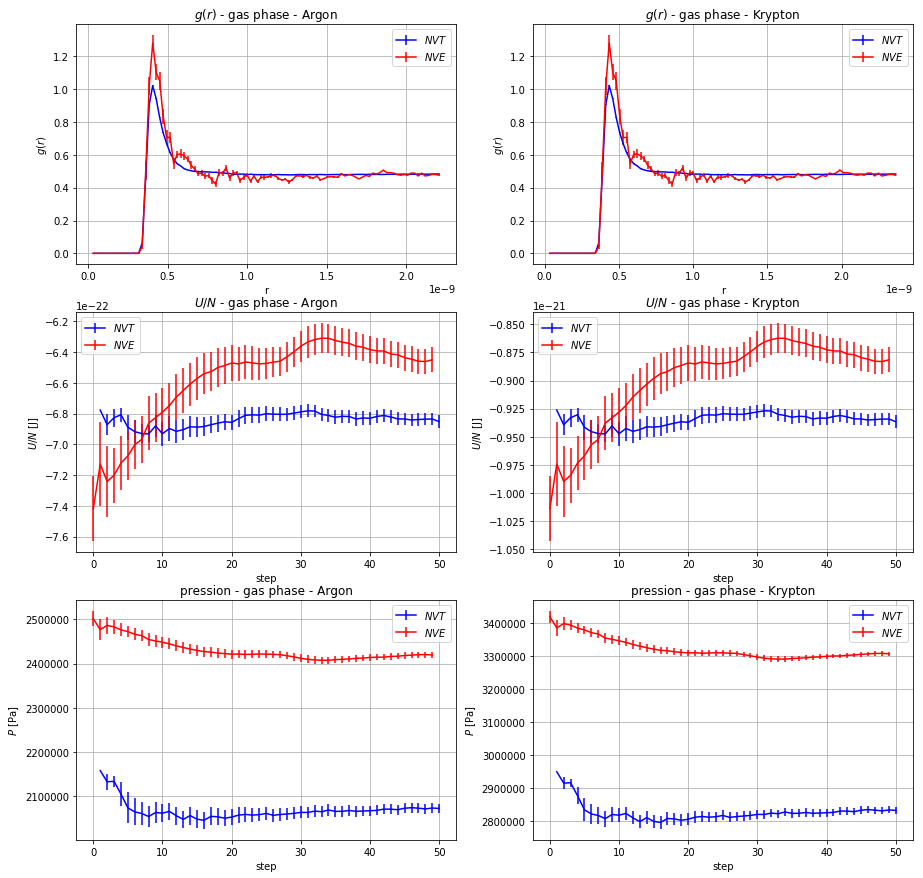

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 15]
fig, ax = plt.subplots(3,2)

#SI units
eps_kb_arg = 120.0
sigma_arg = 0.34E-9
kb = 1.38E-23
eps_arg = eps_kb_arg * kb
eps_kb_kr = 164.0
sigma_kr = 0.364E-9
eps_kr = eps_kb_kr * kb

r_gas_NVT, gofr_gas_NVT, err_g_gas_NVT = np.loadtxt("Esercizio7.1/gas/output.gave.0", usecols=(0,1,2), unpack='true')
r_gas_NVE, gofr_gas_NVE, err_g_gas_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_gas/output.gave.0", usecols=(0,1,2), unpack='true')

step_gas_NVT, en_gas_NVT, err_en_gas_NVT = np.loadtxt("Esercizio7.1/gas/output.epot.0", usecols=(0,2,3), unpack='true')
step_gas_NVE, en_gas_NVE, err_en_gas_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_gas/output_epot_ave.dat", usecols=(0,1,2), unpack='true')

step2_gas_NVT, pr_gas_NVT, err_pr_gas_NVT = np.loadtxt("Esercizio7.1/gas/output.pres.0", usecols=(0,2,3), unpack='true')
step2_gas_NVE, pr_gas_NVE, err_pr_gas_NVE = np.loadtxt("../Esercizio_4/Esercizio4.1/results_gas/output_press_ave.dat", usecols=(0,1,2), unpack='true')

ax[0][0].errorbar(r_gas_NVT*sigma_arg, gofr_gas_NVT, err_g_gas_NVT, color='blue')
ax[0][0].errorbar(r_gas_NVE*sigma_arg, gofr_gas_NVE, err_g_gas_NVE, color='red')
ax[0][0].set_xlabel('r')
ax[0][0].set_ylabel('$g(r)$')
ax[0][0].grid(True)
ax[0][0].set_title("$g(r)$ - gas phase - Argon")
ax[0][0].legend( ['$NVT$', '$NVE$'])

ax[0][1].errorbar(r_gas_NVT*sigma_kr, gofr_gas_NVT, err_g_gas_NVT, color='blue')
ax[0][1].errorbar(r_gas_NVE*sigma_kr, gofr_gas_NVE, err_g_gas_NVE, color='red')
ax[0][1].set_xlabel('r')
ax[0][1].set_ylabel('$g(r)$')
ax[0][1].grid(True)
ax[0][1].set_title("$g(r)$ - gas phase - Krypton")
ax[0][1].legend( ['$NVT$', '$NVE$'])

ax[1][0].errorbar(step_gas_NVT, en_gas_NVT*eps_arg, yerr=err_en_gas_NVT*eps_arg, color='blue')
ax[1][0].errorbar(step_gas_NVE, en_gas_NVE*eps_arg, yerr=err_en_gas_NVE*eps_arg, color='red')
ax[1][0].set_xlabel('step')
ax[1][0].set_ylabel('$U/N$ [J]')
ax[1][0].grid(True)
ax[1][0].set_title("$U/N$ - gas phase - Argon")
ax[1][0].legend( ['$NVT$', '$NVE$'])

ax[1][1].errorbar(step_gas_NVT, en_gas_NVT*eps_kr, err_en_gas_NVT*eps_kr, color='blue')
ax[1][1].errorbar(step_gas_NVE, en_gas_NVE*eps_kr, err_en_gas_NVE*eps_kr, color='red')
ax[1][1].set_xlabel('step')
ax[1][1].set_ylabel('$U/N$ [J]')
ax[1][1].grid(True)
ax[1][1].set_title("$U/N$ - gas phase - Krypton")
ax[1][1].legend( ['$NVT$', '$NVE$'])

ax[2][0].errorbar(step2_gas_NVT, pr_gas_NVT*eps_arg/(sigma_arg**3), err_pr_gas_NVT*eps_arg/(sigma_arg**3), color='blue')
ax[2][0].errorbar(step2_gas_NVE, pr_gas_NVE*eps_arg/(sigma_arg**3), err_pr_gas_NVE*eps_arg/(sigma_arg**3), color='red')
ax[2][0].set_xlabel('step')
ax[2][0].set_ylabel('$P$ [Pa]')
ax[2][0].grid(True)
ax[2][0].set_title("pression - gas phase - Argon")
ax[2][0].legend( ['$NVT$', '$NVE$'])

ax[2][1].errorbar(step2_gas_NVT, pr_gas_NVT*eps_kr/(sigma_arg**3), err_pr_gas_NVT*eps_arg/(sigma_arg**3), color='blue')
ax[2][1].errorbar(step2_gas_NVE, pr_gas_NVE*eps_kr/(sigma_arg**3), err_pr_gas_NVE*eps_arg/(sigma_arg**3), color='red')
ax[2][1].set_xlabel('step')
ax[2][1].set_ylabel('$P$ [Pa]')
ax[2][1].grid(True)
ax[2][1].set_title("pression - gas phase - Krypton")
ax[2][1].legend( ['$NVT$', '$NVE$'])
plt.show()